Use the method here: not working:
https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c

In [1]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
nx = 20
dx = 1. / nx
alpha = 1.0

In [3]:
def f(x, alpha, psy1, dpsy1):
    '''
        d2(psy)/dx2 = f(x, dpsy/dx, psy)
        This is f() function on the right
    '''
    return  - alpha * dpsy1


def psy1_analytic(x, alpha):
    '''
        Analytical solution of current problem
    '''
    return (1. - np.exp(-alpha*x))/alpha

In [4]:
#def f(x, alpha, psy1, dpsy1):

    #return -alpha/5. * np.exp(-x/5.) * np.cos(x) - 1./5. * dpsy1 - psy1


#def psy1_analytic(x, alpha):

    #return np.exp(-x/5.) * np.sin(x)/alpha

In [5]:
x_space = np.linspace(0, 2, nx)    
y_space = psy1_analytic(x_space, alpha)

In [6]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psy1_trial(xi, net_out):
    return xi + xi**2 * net_out

psy1_grad = grad(psy1_trial)
psy1_grad2 = grad(psy1_grad)

In [7]:
def loss_function(W, alpha, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psy1_t = psy1_trial(xi, net_out)
        
        gradient_of_trial = psy1_grad(xi, net_out)
        second_gradient_of_trial = psy1_grad2(xi, net_out)
        
        func = f(xi, alpha, psy1_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum

In [8]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(500):
    loss_grad =  grad(loss_function)(W, alpha, x_space)
    #if i%10 == 0: print(loss_grad)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

0.02507307877553447


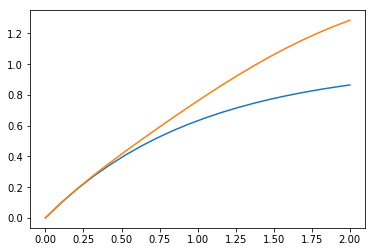

In [9]:
print(loss_function(W, alpha, x_space))
res = [psy1_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, res)
plt.show()

## Another Test

[array([[ 38.03259756, -27.08029996,  18.08222102, -96.20250013,
         18.64345775, -48.1644429 ,   6.08571858,  32.79538088,
         52.60887026, -31.630533  ]]), array([[ 96.84079876],
       [ 56.74467767],
       [ 43.39084721],
       [109.69896572],
       [159.02921841],
       [138.63810055],
       [ 29.30516506],
       [156.70836229],
       [ 78.46820588],
       [ 69.75983219]])]
[array([[-0.85267619,  0.60147234, -0.1445798 ,  2.66306823,  0.01619769,
         0.85144305,  0.02577498, -0.06845765, -1.17967151,  0.88058347]]), array([[ 0.89455669],
       [ 1.86119392],
       [ 2.06817703],
       [ 0.53160703],
       [-0.28998539],
       [-0.11973634],
       [ 2.10649388],
       [-0.28827356],
       [ 1.38645497],
       [ 1.58598855]])]
[array([[-0.41125034,  0.29795442, -0.0622531 ,  1.35442537,  0.01326063,
         0.42075269,  0.01160249, -0.02303549, -0.57484772,  0.44083525]]), array([[ 0.43274466],
       [ 0.92329455],
       [ 1.01780258],
       [ 0.2

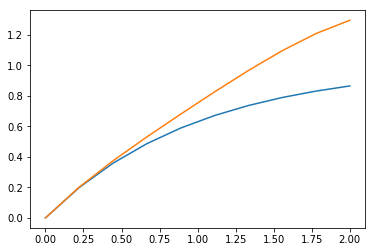

In [19]:
nx = 10
dx = 1. / nx

def f(x, psy, dpsy):
    '''
        d2(psy)/dx2 = f(x, dpsy/dx, psy)
        This is f() function on the right
    '''
    return -dpsy


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return 1 - np.exp(-x)


x_space = np.linspace(0, 2, nx)    
y_space = psy_analytic(x_space)


def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psy_trial(xi, net_out):
    return xi + xi**2 * net_out

psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)


def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum


W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(100):
    loss_grad =  grad(loss_function)(W, x_space)
    if i%20 == 0: print(loss_grad)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]


print(loss_function(W, x_space))
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, res)
plt.show()

[array([[ 174.26578814, 1682.20240464, 1073.03063022,  343.436212  ,
         240.37631015, -246.08929965,  369.04796994, -765.14426189,
        -294.0926166 , -240.89346522]]), array([[2717.99442841],
       [1479.20265432],
       [ 886.24284112],
       [ 739.83934455],
       [2590.34468319],
       [1890.22954145],
       [1977.44446072],
       [1719.08764221],
       [2421.11874963],
       [1684.34683841]])]
173.90411909394206


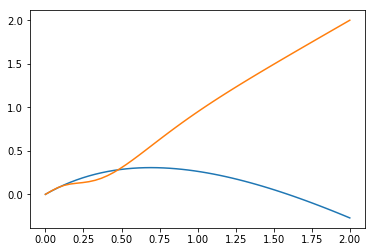

In [22]:
nx = 50
dx = 1. / nx

def f(x, psy, dpsy):
    '''
        d2(psy)/dx2 = f(x, dpsy/dx, psy)
        This is f() function on the right
    '''
    return -dpsy - 1 


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return 2. * (1 - np.exp(-x)) - x


x_space = np.linspace(0, 2, nx)    
y_space = psy_analytic(x_space)


def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psy_trial(xi, net_out):
    return xi + xi**2 * net_out

psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)


def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum


W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(100):
    loss_grad =  grad(loss_function)(W, x_space)
    if i%100 == 0: print(loss_grad)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]


print(loss_function(W, x_space))
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, res)
plt.show()